In [138]:
from folium import plugins
% matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import folium
sld = pd.read_excel('./data/Service Line Data.xls')

def clean_lng_lat(string):
    cleaned = string.strip("W")
    cleaned = cleaned.strip('N')
    
    cleaned = cleaned.replace("°", ' ')
    cleaned = cleaned.replace("'", ' ')
    cleaned = cleaned.replace('"', ' ')
    
    cleaned = [float(i) for i in cleaned.split(' ') if i != '']
    return cleaned[0] + cleaned[1] / 60. + cleaned[2] / 60.**2

sld['lng'] = -sld.Longitude.apply(clean_lng_lat)
sld['lat'] = sld.Latitude.apply(clean_lng_lat)

sld.head()

/Users/Chengyu/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


,PIDdash,Prop_Addr,Prop_City,Prop_State,Prop_Zip,Year_Built,Class,Ward,PRECINCT,CENTRACT,CENBLOCK,Acres,SL_Type,SL_Type2,SL_Lead,Longitude,Latitude,lng,lat
0,40-12-485-002,E SECOND AVE,FLINT,MI,48502,0,CV,5,32,002800,2,0.082002,11,0,0,"83° 41' 38.010"" W","43° 1' 12.561"" N",-83.693892,43.020156
1,47-32-354-027,W BOULEVARD DR,FLINT,MI,48505,0,RW,3,18,980100,1,3.103233,0,0,0,"83° 40' 27.117"" W","43° 2' 56.831"" N",-83.674199,43.049120
2,47-32-353-032,NEW JERSEY AVE,FLINT,MI,48505,0,RW,3,18,980100,1,2.855726,0,0,0,"83° 40' 27.106"" W","43° 2' 59.218"" N",-83.674196,43.049783
3,47-32-355-023,W BOULEVARD DR,FLINT,MI,48505,0,RW,3,18,980100,1,2.763335,0,0,0,"83° 40' 27.588"" W","43° 2' 54.305"" N",-83.674330,43.048418
4,47-32-356-023,W BOULEVARD DR,FLINT,MI,48505,0,RW,3,18,980100,1,2.350834,0,0,0,"83° 40' 28.185"" W","43° 2' 51.609"" N",-83.674496,43.047669


In [2]:
sld.groupby(["SL_Type"]).count()

,PIDdash,Prop_Addr,Prop_City,Prop_State,Prop_Zip,Year_Built,Class,Ward,PRECINCT,CENTRACT,CENBLOCK,Acres,SL_Type2,SL_Lead,Longitude,Latitude,lng,lat
SL_Type,,,,,,,,,,,,,,,,,,
0,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179,13179
1,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974,25974
2,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
3,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
4,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
5,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187
6,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
7,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
8,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18


In [210]:
df = pd.read_csv("./service_data/serviceline_restestdat.csv", index_col=0)

# jan_df = df[df['Date Submitted'] <= "2016-03-01 00:00:00"][df['Date Submitted'] >= "2016-01-01 00:00:00"]

jan_df = df[df['Date Submitted'] >= "2016-01-01 00:00:00"]

In [211]:
len(jan_df)

14914

In [20]:
jan_df.columns

Index(['PIDdash', 'Prop_Addr', 'Prop_City', 'Prop_State', 'Prop_Zip',
       'Year_Built', 'Class', 'Ward', 'PRECINCT', 'CENTRACT', 'CENBLOCK',
       'Acres', 'SL_Type', 'SL_Type2', 'SL_Lead', 'Longitude_x', 'Latitude_x',
       'Sample Number', 'Date Submitted', 'Analysis (Lead)', 'Lead (ppb)',
       'Analysis (Copper)', 'Copper (ppb)', 'Street #', 'Street Name', 'City',
       'Zip Code', 'Full Address', 'Best Address', 'Clean Address', 'PID Dash',
       'PID no Dash', 'Property Address', 'Property Zip Code', 'Owner Type',
       'Owner Name', 'Owner Address', 'Owner Zip Code', 'Owner City',
       'Owner State', 'Owner Country', 'Tax Payer Name', 'Tax Payer Address',
       'Tax Payer State', 'Tax Payer Zip Code', 'Homestead',
       'Homestead Percent', 'HomeSEV', 'Land Value', 'Land Improvements Value',
       'Residential Building Value', 'Residential Building Style',
       'Commercial Building Value', 'Building Storeys', 'Parcel Acres',
       'Rental', 'Use Type', 'Prop Cla

In [216]:
cols = ['PIDdash', 'Year_Built', 'SL_Type', 'Lead (ppb)', 'Latitude_x', 'Longitude_x', 'Date Submitted']
rd_jan_df = jan_df[cols]
rd_jan_df = rd_jan_df[rd_jan_df['Lead (ppb)'] >= 15]

In [225]:
rd_jan_df['Date Submitted']

13       2016-02-23 12:41:57
64       2016-02-23 12:41:57
88       2016-02-23 12:41:57
92       2016-02-23 12:41:57
131      2016-02-23 12:41:57
142      2016-02-23 12:41:57
163      2016-03-30 12:32:19
164      2016-01-31 13:05:57
178      2016-02-23 12:41:57
179      2016-02-23 12:41:57
186      2016-02-23 12:41:57
189      2016-02-23 12:41:57
213      2016-01-29 13:01:45
214      2016-03-16 13:15:20
216      2016-02-24 13:29:11
217      2016-03-04 12:31:05
221      2016-03-17 12:08:26
230      2016-01-15 11:02:59
262      2016-02-26 12:37:41
265      2016-03-31 11:29:15
269      2016-03-24 13:18:04
287      2016-02-02 13:22:23
288      2016-02-23 13:11:07
300      2016-04-01 12:03:15
312      2016-03-25 12:09:02
323      2016-01-25 12:59:32
327      2016-02-20 12:20:20
330      2016-02-20 12:21:29
350      2016-03-09 12:44:49
358      2016-03-16 10:18:41
                ...         
14817    2016-01-27 13:02:18
14878    2016-02-18 13:00:44
14879    2016-02-18 13:00:58
15060    2016-

In [229]:
from sklearn.preprocessing import OneHotEncoder

In [230]:
np.unique(rd_jan_df.SL_Type)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [231]:
X = pd.get_dummies(rd_jan_df['SL_Type']).as_matrix()
y = np.log(rd_jan_df['Lead (ppb)'])


In [232]:
X.shape
y.shape


(1300,)

In [233]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
lr = LinearRegression()
lr.fit(X,y)
lr.coef_

array([-0.0668514 , -0.01704129, -0.63016097, -0.97895916, -0.19971894,
       -0.27906459,  0.45784663, -0.41734049, -1.0901848 ,  1.01824428,
        2.19116509,  0.01206564])

In [236]:
np.unique(rd_jan_df.SL_Type)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

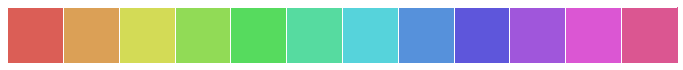

In [237]:
import folium
from folium import plugins
import seaborn as sns
import matplotlib.pyplot as plt

# pal = sns.color_palette("cubehelix", 15)
pal = sns.color_palette("hls", 12)
sns.palplot(pal)
plt.show()

pal_hex_converter = lambda tup: '#%02x%02x%02x' % (int(tup[0]*255), int(tup[1]*255), int(tup[2]*255))
get_pal = lambda label: pal[label]

In [238]:
color = rd_jan_df.SL_Type.apply(get_pal).apply(pal_hex_converter)

In [239]:
color.iloc[0]

'#db5691'

In [240]:
# rd_jan_df.SL_Type.apply(get_pal).apply(pal_hex_converter)

In [241]:
for i in tqdm(range(int(len(rd_jan_df)))):
    rd_jan_df['Lead (ppb)'].iloc[i]

100%|██████████| 1300/1300 [00:00<00:00, 71197.58it/s]


In [242]:
SL_TYPE = {
    0:  "Unknown/Other ",
    1:  "Copper",
    2:  "Tubeloy",
    3:  "Zinc",
    4:  "Lead",
    5:  "Copper/Lead",
    6:  "Copper/Zinc",
    7:  "Copper/Tubeloy",
    8:  "Lead/Zinc",
    9:  "Lead/Tubeloy",
    10: "Copper/?",
    11: "Galvanized/Other",
    }

In [243]:
from tqdm import *

TypeError: bad operand type for unary +: 'str'

In [261]:
map_2 = folium.Map(location=[43.0125, -83.6875], zoom_start=12)

for i in tqdm(range(int(len(rd_jan_df)))):
    popup = "Service Line Material: \t" + str(SL_TYPE[rd_jan_df.SL_Type.iloc[i]]) + ', ' \
                + "\nLead Reading: \t\t"+ str(rd_jan_df['Lead (ppb)'].iloc[i]) + ' ppb' + ', '   \
                + "\nSample Submitted Date: \t"+ rd_jan_df['Date Submitted'].iloc[i][:11]

    folium.CircleMarker([rd_jan_df.Latitude_x.iloc[i], rd_jan_df.Longitude_x.iloc[i]], radius=14*np.log(rd_jan_df["Lead (ppb)"].iloc[i]),
                        popup=popup, color=color.iloc[i],
                        fill_color=color.iloc[i]).add_to(map_2)
    
    
# for i in range(int(len(sld_3))):
#     folium.CircleMarker([sld_3.lat.iloc[i], sld_3.lng.iloc[i]], radius=30,
#                         popup='Laurelhurst Park', color='#ff5a44',
#                         fill_color='#ff5a44').add_to(map_2)
map_2


100%|██████████| 1300/1300 [00:29<00:00, 43.90it/s]


In [262]:
map_2.create_map(path="service_line.html")

/Users/Chengyu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Map.create_map is deprecated. Use Map.save instead
  if __name__ == '__main__':


In [259]:
for i in tqdm(range(int(len(rd_jan_df)))):
    popup = "Service Line Material: \t" + str(SL_TYPE[rd_jan_df.SL_Type.iloc[i]]) + ', ' \
                + "\nLead Reading: \t\t"+ str(rd_jan_df['Lead (ppb)'].iloc[i]) + 'ppb' + ', '   \
                + "\nSample Submitted Date: \t"+ rd_jan_df['Date Submitted'].iloc[i][:11]
print(popup)

100%|██████████| 1300/1300 [00:00<00:00, 21778.41it/s]


Service Line Material: 	Copper, 
Lead Reading: 		76.0ppb, 
Sample Submitted Date: 	2016-02-12 
